# 3. Linear regression
- [3.1 Simple Linear Regression](#3.1-Simple-Linear-Regression)
-  [3.2 Hypothesis testing and confidence intervals](#3.2-Hypothesis-testing-and-confidence-intervals)


In [11]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
# plt.style.use('seaborn-white')
sns.set_style('darkgrid')

In [4]:
auto =  pd.read_csv('Data/Auto.csv', na_values='?').dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


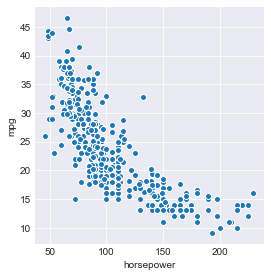

In [14]:
# Visualize the relationship between the features and the response
# sns.regplot(X, y, order=1, ci=None, scatter_kws={'color':'r', 's':9})
# by auto[['horsepower','mpg']] we can extract 2 columns from a dataframe
sns.pairplot(auto[['horsepower','mpg']], x_vars='horsepower', y_vars='mpg', size = 4)

## Excersice 8
- Performance linear regression with mpg as the response and horsepower as the predictor. Comment the output:
    1. Is there a relationship between the predictor and the response?
    2.  How strong is the relationship between the predictor and the response?
    3. Is the relationship between the predictor and the response positive or negative?
    3. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?


In [3]:
# Performance linear regression with mpg as the response and horsepower as the predictor
reg = skl_lm.LinearRegression()
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
reg.fit(X, y)
print('Intercept: ', reg.intercept_)
print('Coefficients: ', reg.coef_)

Intercept:  39.93586102117047
Coefficients:  [-0.15784473]


To analyse the relatonship between the predictor and the response
- null hypothesis: $\beta_1 =0$
- alternative hypothesis: $\beta_1 \neq 0$ 
We reject the null hypothesis if there is p-value>0.05

In [19]:
# Using STATMODELS
data = auto[['horsepower', 'mpg']]
lm1 = smf.ols(formula='mpg ~ horsepower', data=data).fit()
lm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Thu, 27 Dec 2018   Prob (F-statistic):           7.03e-81
Time:                        14:06:31   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
lm1.predict(98)

TypeError: object of type 'int' has no len()

1. There is a relationship between horsepower and mpg as deterined by testing the null hypothesis of all regression coefficients equal to zero. 
2. 
3. Negative
4. 

# Excercise 9

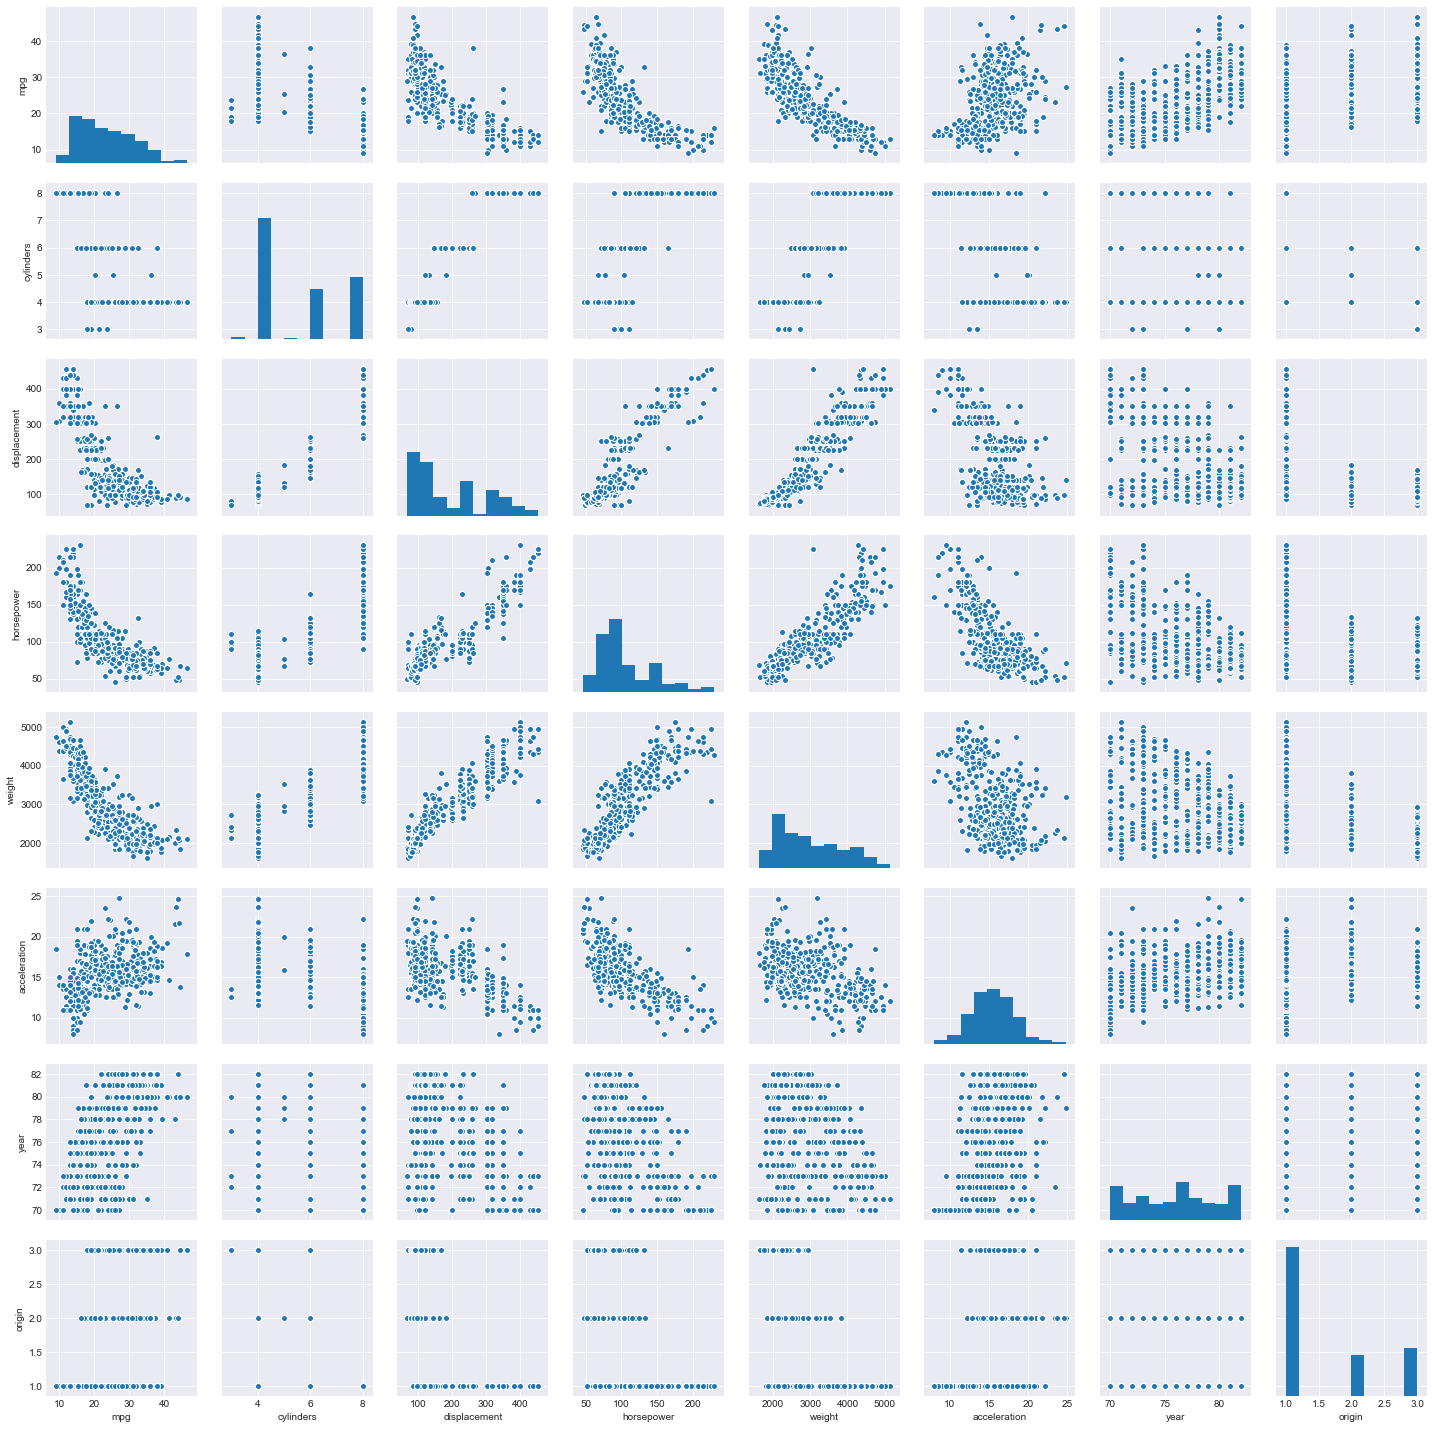

In [21]:
# Scatter plot data
sns.pairplot(auto)

In [22]:
# Correlation matrix
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [23]:
lm1 = smf.ols(formula='mpg ~ cylinders + displacement + horsepower + weight + acceleration+year + origin', data=auto).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Thu, 27 Dec 2018   Prob (F-statistic):          2.04e-139
Time:                        14:26:02   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. **Is there a relationship between the predictors and the response?**
Yes, F is far from 1, so at least there are 1 predictor which is related to the response
2. **Which predictors appear to have a statistically significant relationship to the response?**
Looking at the p-value of each predictor, displacement, weight, year and origin has p-value <0.05, so they appear to have statistically significant relationship
3. **What does the coefficient for the year variable suggest?**
The coeficcient of the year = 0.7508, suggesting for every year the mpg increase 0.7508